#Combining and Propagating Errors

See [this pdf](ErrorPropagation.pdf) for the theory, and for a table of frequently used formulae.

##Functions of one variable

If _f_(_x_) is a function of _x_, and _x_ has uncertainty &sigma;<sub>_x_</sub>, what is the corresponding uncertainty on _f_?

For a sufficiently small &sigma;<sub>_x_</sub>, we can approximate &sigma;<sub>_f_</sub>/&sigma;<sub>_x_</sub> by the derivative |d_f_/d_x_| (taking the absolute value because &sigma; is conventionally defined as positive).  So &sigma;<sub>_f_</sub> &asymp; &sigma;<sub>_x_</sub> |d_f_/d_x_|.  The code below tests this for _f_(_x_) = sin(_x_).  The "brute force" error bars of |sin(_x_+&sigma;<sub>_x_</sub>) - sin(_x_)| and |sin(x) - sin(x-&sigma;<sub>_x_</sub>)| are also given.



True value of x = 35.000  degrees; sin(x) = 0.5736
True uncertainty of x =  1.000  degrees; predicted uncertainty of sin(x) = 0.0143
Brute force prediction: lower error bar = 0.0144 , upper error bar = 0.0142
Mean value of x = 35.011  degrees; mean value of sin(x) = 0.5737
Calculated sigma of x =  0.990  degrees, and of sin(x) = 0.0141


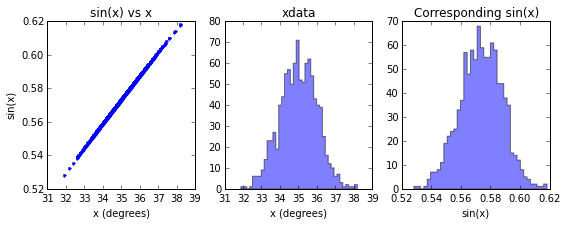

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xtrue = 35 #degrees
sigx = 1 #degrees
ytrue = np.sin(np.radians(xtrue))
sigy = np.radians(sigx)*np.cos(np.radians(xtrue))
ymin = np.sin(np.radians(xtrue-sigx))
ymax = np.sin(np.radians(xtrue+sigx))
ylow = ytrue-ymin
yhigh = ymax-ytrue

xdata=np.random.normal(xtrue,sigx,1000)
ydata=np.sin(np.radians(xdata))
xsig = xdata.std()
ysig = ydata.std()
xmean = xdata.mean()
ymean = ydata.mean()

print('True value of x = %6.3f'%xtrue,' degrees; sin(x) = %6.4f'%ytrue)
print('True uncertainty of x = %6.3f'%sigx,' degrees; predicted uncertainty of sin(x) = %6.4f'%sigy)
print('Brute force prediction: lower error bar = %6.4f'%ylow,', upper error bar = %6.4f'%yhigh)
print('Mean value of x = %6.3f'%xmean,' degrees; mean value of sin(x) = %6.4f'%ymean)
print('Calculated sigma of x = %6.3f'%xsig,' degrees, and of sin(x) = %6.4f'%ysig)

plt.figure(1,figsize=(9,3))
plt.subplot(131)
plt.plot(xdata,ydata,'b.')
plt.title('sin(x) vs x')
plt.xlabel('x (degrees)')
plt.ylabel('sin(x)')

plt.subplot(132)
xcounts,xbins,patches=plt.hist(xdata,40,histtype='stepfilled',facecolor='b',alpha=0.5)
plt.title('xdata')
plt.xlabel('x (degrees)')

plt.subplot(133)
ycounts,ybins,patches=plt.hist(ydata,40,histtype='stepfilled',facecolor='b',alpha=0.5)
plt.title('Corresponding sin(x)')
plt.xlabel('sin(x)')

If you make the uncertainty **sigx** large enough that the plot of sin(_x_) against _x_ on the left is visibly non-linear, then the agreement of the predicted value of &sigma;(sin _x_) with the calculated value will deteriorate, and the "brute-force" error bars will become significantly asymmetric; you may also see the distribution of sin(_x_) on the right becoming less Gaussian. 

##Functions of more than one variable

The general rule, which is exact for linear functions and approximately correct for nonlinear functions, is

$$
\sigma_f^2 = \left|\frac{\partial f}{\partial x}\right|^2\sigma_x^2 + \left|\frac{\partial f}{\partial y}\right|^2\sigma_y^2 + 2\frac{\partial f}{\partial x}\,\frac{\partial f}{\partial y}V_{xy}
$$

where _V_<sub>_xy_</sub> is the covariance of _x_ and _y_, which is zero for uncorrelated variables.

The example below looks at _x_ + _y_ for uncorrelated variables (blue) and correlated variables (red).  If the correlation is positive, the uncertainty in the sum is greater than for uncorrelated variables (the errors in _x_ and _y_ reinforce each other), whereas if it is negative, the uncertainty in the sum is reduced (the errors in _x_ and _y_ tend to cancel).  If you change the function from _x_ + _y_ to _x_ - _y_, the opposite will happen. 

xtrue = 3.000 ± 1.000
ytrue = 4.000 ± 1.000
Correlation coefficient = -0.900
Prediction for uncorrelated sum:  7.000 ± 1.414
Prediction for correlated sum:  7.000 ± 0.447
Calculated uncorrelated sum:  7.008 ± 1.434
Calculated correlated sum:  6.992 ± 0.450


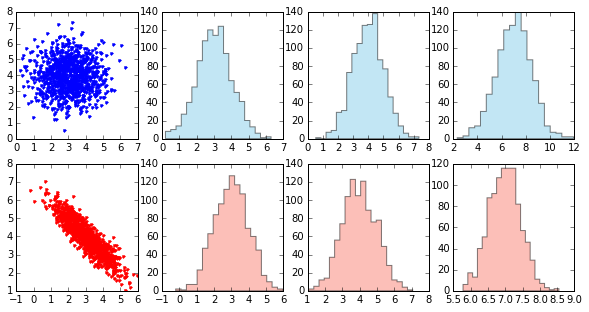

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def gaussian(x,mu,sigma):
    return np.exp(-0.5*np.power((x-mu)/sigma,2))/(np.sqrt(2*np.pi*sigma*sigma))

xtrue = 3.0
sigx = 1.0
ytrue = 4.0
sigy = 1.0
corrxy=-0.90
sumxy = xtrue+ytrue
mean=[xtrue,ytrue]
sigf = np.sqrt(sigx*sigx + sigy*sigy)
sigfc = np.sqrt(sigx*sigx + sigy*sigy + 2*sigx*sigy*corrxy)

covxy=[[sigx*sigx,corrxy*sigx*sigy],[corrxy*sigx*sigy,sigy*sigy]]

xdata = np.random.normal(xtrue,sigx,1000)
ydata = np.random.normal(ytrue,sigy,1000) #xdata and ydata are uncorrelated

xcorr,ycorr = np.random.multivariate_normal(mean,covxy,1000).T

fdata = xdata+ydata
fcorr = xcorr+ycorr

fdmean = fdata.mean()
fdsig  = fdata.std()
fcmean = fcorr.mean()
fcsig  = fcorr.std()

print('xtrue = %5.3f'%xtrue,"\u00b1",'%5.3f'%sigx)
print('ytrue = %5.3f'%ytrue,"\u00b1",'%5.3f'%sigy)
print('Correlation coefficient = %5.3f'%corrxy)
print('Prediction for uncorrelated sum: %6.3f'%sumxy,"\u00b1",'%5.3f'%sigf)
print('Prediction for correlated sum: %6.3f'%sumxy,"\u00b1",'%5.3f'%sigfc)
print('Calculated uncorrelated sum: %6.3f'%fdmean,"\u00b1",'%5.3f'%fdsig)
print('Calculated correlated sum: %6.3f'%fcmean,"\u00b1",'%5.3f'%fcsig)

plt.figure(1,figsize=(10,5))
plt.subplot(241)
plt.plot(xdata,ydata,'b.')

plt.subplot(242)
counts,bins,patches=plt.hist(xdata,20,histtype='stepfilled',facecolor='skyblue',alpha=0.5)

plt.subplot(243)
counts,bins,patches=plt.hist(ydata,20,histtype='stepfilled',facecolor='skyblue',alpha=0.5)

plt.subplot(244)
counts,bins,patches=plt.hist(fdata,20,histtype='stepfilled',facecolor='skyblue',alpha=0.5)

plt.subplot(245)
plt.plot(xcorr,ycorr,'r.')

plt.subplot(246)
counts,bins,patches=plt.hist(xcorr,20,histtype='stepfilled',facecolor='salmon',alpha=0.5)

plt.subplot(247)
counts,bins,patches=plt.hist(ycorr,20,histtype='stepfilled',facecolor='salmon',alpha=0.5)

plt.subplot(248)
counts,bins,patches=plt.hist(fcorr,20,histtype='stepfilled',facecolor='salmon',alpha=0.5)

(Note: the actual value of the calculated sum does not fluctuate nearly as much as its quoted error might lead you to expect.  This is because what we are printing is the _mean_ of 1000 measurements.  As noted [earlier](gaussian.ipynb), the error on the mean of _N_ measurements is &sigma;/&radic;_N_, so the fluctuations should be about 1/30 of the quoted &sigma;.)